# Preparación datos, análisis exploratorio

In [1]:
# Para operaciones numericas y matrices
import numpy as np

# Para implementacion de algoritmos numericos
import scipy as sp

# Manipulacion de datos
import pandas as pd
# Visualización
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Contenido

* Acceso información
* Familiarizacion Preparación de datos
* Analisis exploratorio

In [3]:
ruta_datos = 'C:\\Users\\Jorge\\Google Drive\\Ceine\\clase_mbe\\talleres\\aux_1\\python\\'

In [2]:
tiempo_df= pd.read_csv('tiempo.csv') # para utilizar una función de pandas, llamamos a la libreria con el alias 
# y despues la funcion de acuerdo a los parametros que necesita, en este caso solo la ruta del archivo.
# deben cambiarla para hacer referencia a la ruta de su propio equipo
#ojo con \\, son importantes

In [5]:
# En pandas las tablas se llaman dataframes, es común utilizar la notacion df

**Tomemos un vistazo...**

In [3]:
tiempo_df.head(5) # simplemente se llama al objeto del dataframe y la función que queramos
# para las n primeras filas se hace con .head(n)
# si fuesen las ultimas es .tail(n)
# notar la primera columna no tiene titulo. Cuando no especificamos un indice para cada fila pandas la crea por nosotros

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


## Manipulacion de datos

In [4]:
tiempo_df.reset_index().head(5) # si queremos ir a buscar los índices de fila, una forma rápida es con reset_index(),
# el cual nos crea un nuevo indice de acuerdo a la posición de cada fila y agrega el índice anteriormente utilizado como columna

,index,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


tiempo_df=tiempo_df.reset_index()

Que representa 'Unnamed: 0'?... tratemos de visualizar.

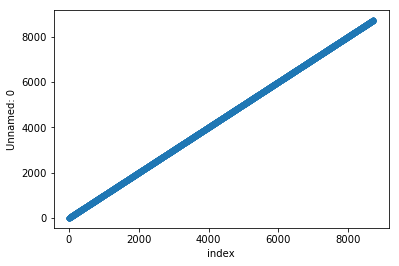

In [5]:
tiempo_df.reset_index().plot(kind = 'scatter', x = 'index', y = 'Unnamed: 0') # cada dataframe nos entrega una serie de métodos
# una de ellas visualizar. Solo debemos especificar que tipo de visualización y los parametros que cada vizualización necesita.


Al parecer es un id de fila, renombremosla.

In [6]:
tiempo_df.rename(columns = {'Unnamed: 0': 'id_fila'}, inplace = True)

In [7]:
tiempo_df.head(5)

,id_fila,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


¿ Que tipo de información parece ser ?

In [9]:
tiempo_df.describe(include= "all") # Describe nos entrega un resumen de cada columna numerica

,id_fila,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
count,8719.000000,8719,8719.0,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8486.000000,8718.000000,8718.000000,8719.000000,7780.000000,8719.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,EWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4360.000000,NaN,2013.0,6.506538,15.679628,11.515715,55.484942,41.794184,62.863333,193.194674,9.335732,10.743374,0.003035,1017.826465,9.224522
std,2517.102832,NaN,0.0,3.439961,8.768250,6.916846,18.345817,19.619776,19.572699,110.541333,12.328261,14.187117,0.022686,7.396722,2.094044
min,1.000000,NaN,2013.0,1.000000,1.000000,0.000000,10.940000,-9.040000,13.950000,0.000000,0.000000,0.000000,0.000000,983.900000,0.120000
25%,2180.500000,NaN,2013.0,4.000000,8.000000,6.000000,39.920000,26.060000,47.602500,110.000000,5.753900,6.621473,0.000000,1012.800000,10.000000
50%,4360.000000,NaN,2013.0,7.000000,16.000000,12.000000,55.940000,42.800000,62.330000,220.000000,9.206240,10.594357,0.000000,1017.500000,10.000000
75%,6539.500000,NaN,2013.0,9.000000,23.000000,18.000000,71.060000,57.920000,78.790000,280.000000,12.658580,14.567241,0.000000,1022.900000,10.000000


La temperatura esta en Fahrenheit. Transformemosla para que sea más simple de interpretar, cambiando de unidades

In [11]:
def c_to_f(fahr):
    cels = (fahr - 32) * 5.0/9.0
    return cels

In [12]:
tiempo_df['temp_cels'] = tiempo_df['temp'].apply(c_to_f) # apply aplica una funcion a cada elemento que definamos, 
# en este caso a cada elemento de la columna temp

In [14]:
tiempo_df.tail(5)

,id_fila,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,temp_cels
8714,8715,JFK,2013,9.0,2.0,20.0,75.20,73.40,94.14,200.0,4.60312,5.297178,0.0,NaN,4.0,24.0
8715,8716,JFK,2013,10.0,23.0,10.0,48.92,39.02,68.51,60.0,4.60312,5.297178,0.0,1008.1,10.0,9.4
8716,8717,JFK,2013,10.0,23.0,11.0,48.92,39.02,68.51,40.0,4.60312,5.297178,0.0,1008.5,10.0,9.4
8717,8718,JFK,2013,12.0,17.0,5.0,26.96,10.94,50.34,40.0,4.60312,5.297178,0.0,1023.9,10.0,-2.8
8718,8719,LGA,2013,8.0,22.0,22.0,75.92,66.92,73.68,210.0,8.05546,9.270062,0.0,1011.9,10.0,24.4


Y si tratamos de construir una columna con toda la información de fecha?

In [15]:
tiempo_df['fecha'] =pd.to_datetime(tiempo_df[['year', 'month', 'day', 'hour']], format = "%Y/%m/%d:%H:%M")
# to_date_time convierte un objeto a formato fecha, espeficando las columnas de input y el formato de output

** Pregunta: ¿Donde se registró la maxima temperatura? **

In [16]:
tiempo_df.head(10)

,id_fila,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,temp_cels,fecha
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2.8,2013-01-01 00:00:00
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2.8,2013-01-01 01:00:00
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,3.3,2013-01-01 02:00:00
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,3.3,2013-01-01 03:00:00
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,3.3,2013-01-01 04:00:00
5,6,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,3.9,2013-01-01 06:00:00
6,7,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0,3.9,2013-01-01 07:00:00
7,8,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0,3.9,2013-01-01 08:00:00
8,9,EWR,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0,4.4,2013-01-01 09:00:00
9,10,EWR,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0,3.9,2013-01-01 10:00:00


In [19]:
tiempo_df[tiempo_df.temp == tiempo_df.temp.max()] # acá nos gustaría filtrar las filas que tengan la máx temp.
# Si queremos filtrar por filas (pandas filtra por filas por default pero se puede utilizar también para columnas) 
# ocupamos la notación [] de la misma forma que en para las listas.
# y adentro del corchete entregamos la condición por la cual vamos a filtrar.

,id_fila,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,temp_cels,fecha
4765,4766,EWR,2013,7.0,18.0,19.0,100.04,66.02,33.23,300.0,9.20624,10.594357,0.0,1015.0,10.0,37.8,2013-07-18 19:00:00
4790,4791,EWR,2013,7.0,19.0,20.0,100.04,71.06,39.51,230.0,20.71404,23.837303,0.0,1009.4,10.0,37.8,2013-07-19 20:00:00
